In [74]:
import glob
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

TODO

- we need a figure on the link capacity for the two technologies from 0 to 10km
like:
- figure on pathloss with 60 GHz and 70GHz with and without GAL
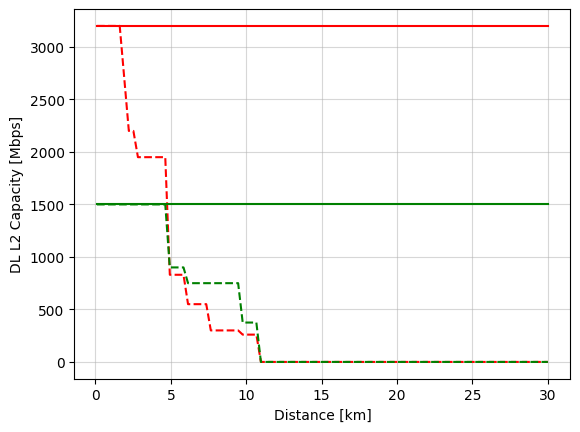
- distribution of MCS to justify the max_bw value a posteriori
- figure with number of antennas to justify that we pick C_s=100

In [75]:
bws = []
costs = []
n_ant = []
for dev in ['802.11ac', '802.11ad_pro']:
    bw_f = glob.glob(f'../processed/{dev}/bw*.csv')
    cost_f = glob.glob(f'../processed/{dev}/costs*.csv')
    n_ant_f = glob.glob(f'../processed/{dev}/n_ant*.csv')

    for f in bw_f:
        mgb = int(f.split('_')[-1].split('.')[0])
        df = pd.read_csv(f)
        df['mgb'] = mgb
        df['device'] = dev
        df.rename(columns={"#ratio": "ratio"}, inplace=True)
        bws.append(df)
    
    for f in cost_f:
        mgb = int(f.split('_')[-1].split('.')[0])
        df = pd.read_csv(f)
        df['mgb'] = mgb
        df['device'] = dev
        df.rename(columns={"#cluster_size": "cluster_size"}, inplace=True)
        costs.append(df)
    
    for f in n_ant_f:
        mgb = int(f.split('_')[-1].split('.')[0])
        df = pd.read_csv(f)
        df['mgb'] = mgb
        df['device'] = dev
        df.rename(columns={"#ratio": "ratio"}, inplace=True)
        n_ant.append(df)

bw_df = pd.concat(bws)
costs_df = pd.concat(costs)
n_ant_df = pd.concat(n_ant)
costs_df.set_index(['cluster_size', 'mgb', 'ratio', "device"], inplace=True)
bw_df.set_index(["cluster_size", "mgb", "ratio", "device"], inplace=True)

In [76]:
costs_df

fiber_cost_mean  fiber_cost_ci  \
cluster_size mgb ratio device                                         
50           30  25    802.11ac             4.905921       0.057350   
                 50    802.11ac             4.679679       0.037043   
                 100   802.11ac             4.642807       0.048133   
100          30  25    802.11ac             5.184695       0.085964   
                 50    802.11ac             4.654472       0.046220   
...                                              ...            ...   
             5   50    802.11ad_pro         0.891907       0.014742   
                 100   802.11ad_pro         0.816895       0.008591   
200          5   25    802.11ad_pro         0.981279       0.032579   
                 50    802.11ad_pro         0.942259       0.019761   
                 100   802.11ad_pro         0.813741       0.009302   

                                     transport_cost_mean  transport_cost_ci  \
cluster_size mgb ratio device                                                 
50           30  25    802.11ac                13.315624           0.427628   
                 50    802.11ac                 7.814568           0.323284   
                 100   802.11ac                 5.405731           0.306170   
100          30  25    802.11ac                14.311969           0.542339   
                 50    802.11ac                 7.668234           0.337882   
...                                                  ...                ...   
             5   50    802.11ad_pro             5.177691           0.273043   
                 100   802.11ad_pro             2.804046           0.114425   
200          5   25    802.11ad_pro            10.797098           0.607883   
                 50    802.11ad_pro             5.639990           0.333041   
                 100   802.11ad_pro             2.809066           0.117058   

                                     unplanned_cost_mean  unplanned_cost_ci  \
cluster_size mgb ratio device                                                 
50           30  25    802.11ac                 2.774175           0.021631   
                 50    802.11ac                 2.382835           0.018430   
                 100   802.11ac                 1.955164           0.018045   
100          30  25    802.11ac                 2.624376           0.026648   
                 50    802.11ac                 2.255068           0.020939   
...                                                  ...                ...   
             5   50    802.11ad_pro             2.877315           0.023945   
                 100   802.11ad_pro             2.251580           0.020531   
200          5   25    802.11ad_pro             3.352142           0.033813   
                 50    802.11ad_pro             2.714000           0.027764   
                 100   802.11ad_pro             2.152054           0.021069   

                                     power_consumption_mean  \
cluster_size mgb ratio device                                 
50           30  25    802.11ac                    5.879697   
                 50    802.11ac                    5.088415   
                 100   802.11ac                    4.156224   
100          30  25    802.11ac                    5.716757   
                 50    802.11ac                    4.889638   
...                                                     ...   
             5   50    802.11ad_pro                4.718151   
                 100   802.11ad_pro                3.705320   
200          5   25    802.11ad_pro                5.429092   
                 50    802.11ad_pro                4.561809   
                 100   802.11ad_pro                3.528916   

                                     power_consumption_ci  capex_mean  \
cluster_size mgb ratio device                                           
50           30  25    802.11ac                  0.036978   23.581540   
                 5

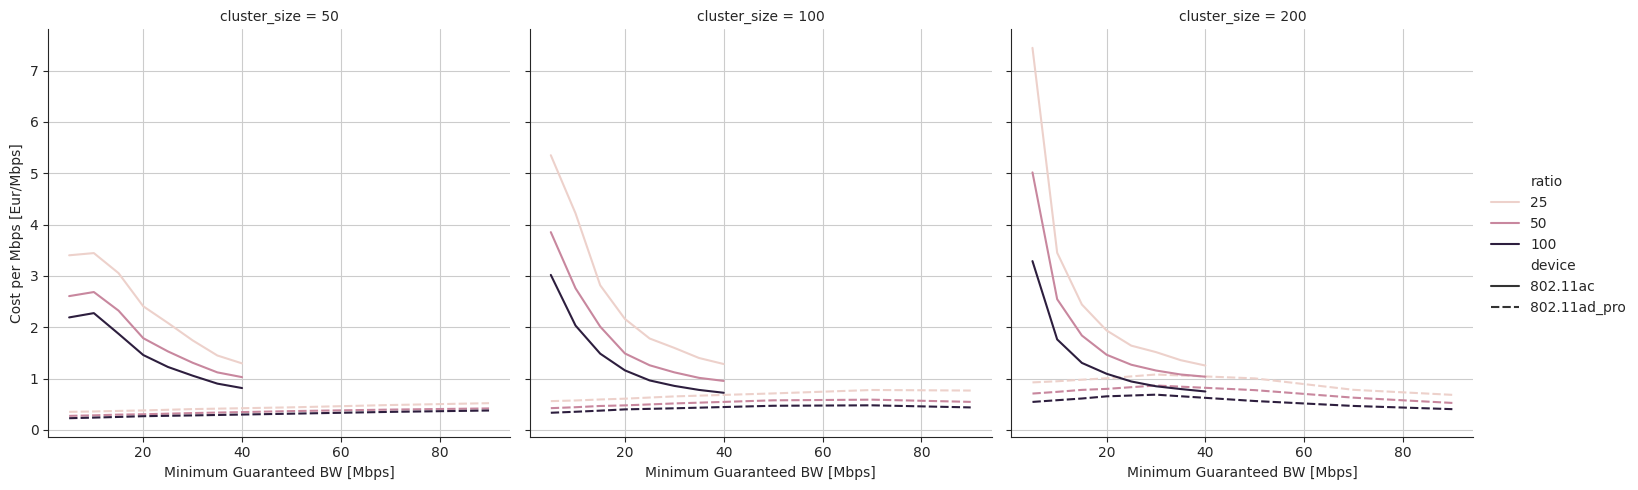

In [77]:
cost_mbps = (costs_df['sum']/bw_df[bw_df.bw_type=='min'].bw).to_frame(name="cost/mbps")
cost_mbps.reset_index(inplace=True)
fg = sns.relplot(data=cost_mbps, x='mgb', hue='ratio', kind='line', style='device', y='cost/mbps', col='cluster_size',)
sns.set_style("ticks",{'axes.grid' : True})

fg.set_ylabels("Cost per Mbps [Eur/Mbps]")
fg.set_xlabels("Minimum Guaranteed BW [Mbps]")


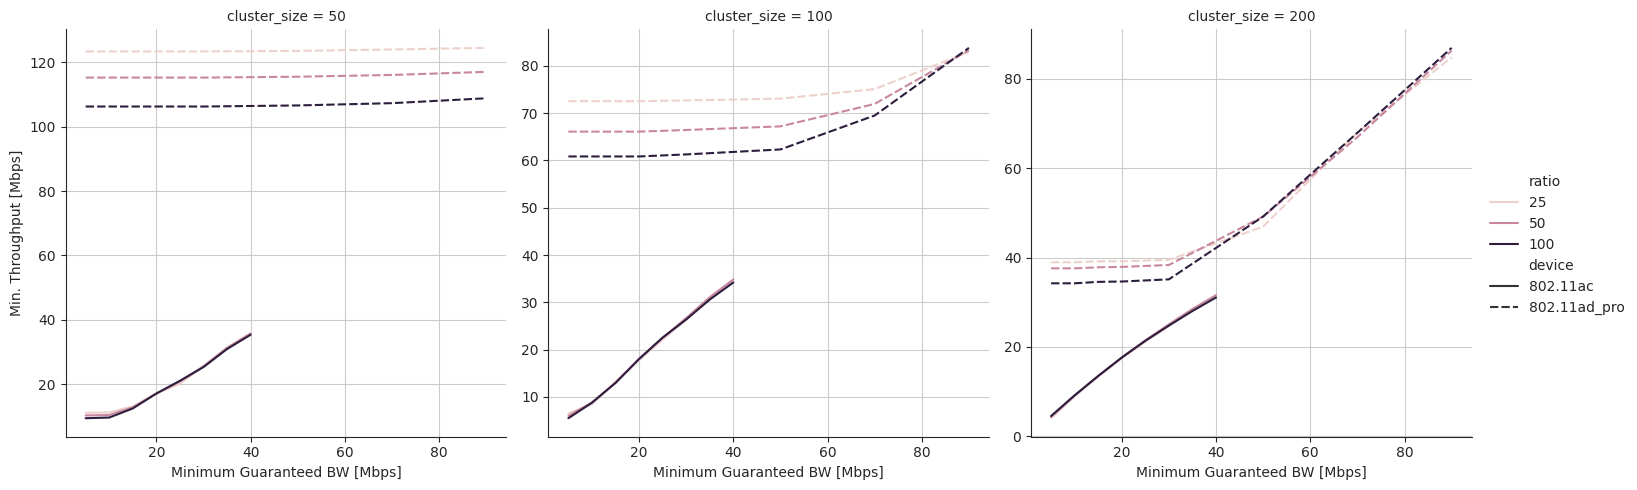

In [88]:
sns.set_style("ticks",{'axes.grid' : True})
fg = sns.relplot(data=bw_df[(bw_df.bw_type=='min')], x='mgb', hue='ratio', kind='line', col='cluster_size', style='device', y='bw', facet_kws={'sharey': False, 'sharex': True})

fg.set_ylabels("Min. Throughput [Mbps]")
fg.set_xlabels("Minimum Guaranteed BW [Mbps]")
plt.savefig("/home/gabriel/git/ODCM/analysis/figures/minbw.pdf")

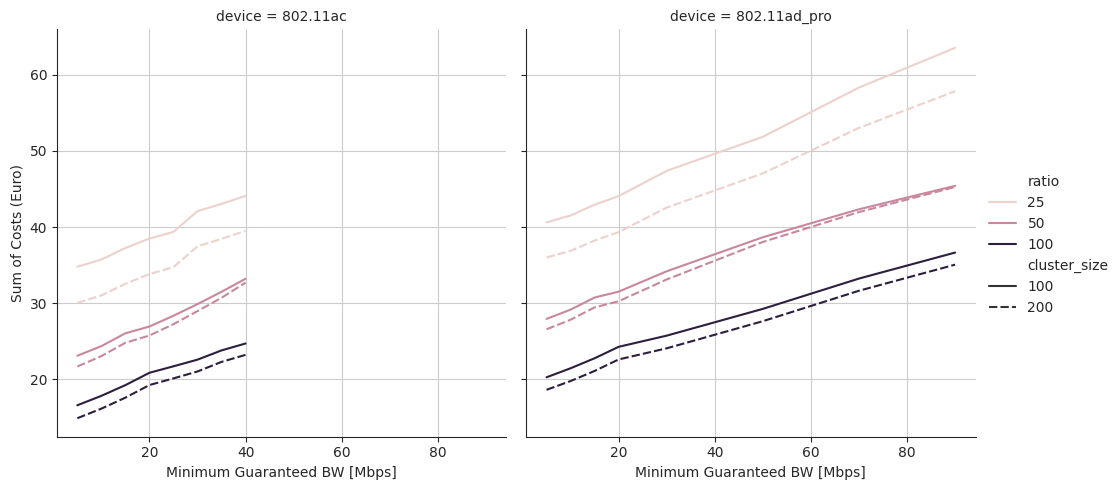

In [89]:
#sns.set_style("ticks",{'axes.grid' : True
costs_df.reset_index(inplace=True)
fg = sns.relplot(data=costs_df[(costs_df.cluster_size>=100)], x='mgb', hue='ratio', y='sum', kind='line', col='device',style="cluster_size")

fg.set_ylabels("Sum of Costs (Euro)")
fg.set_xlabels("Minimum Guaranteed BW [Mbps]")
plt.savefig("/home/gabriel/git/ODCM/analysis/figures/costs.pdf")

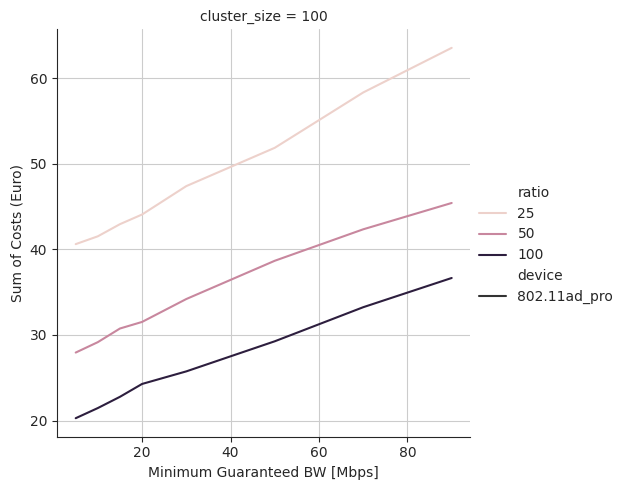

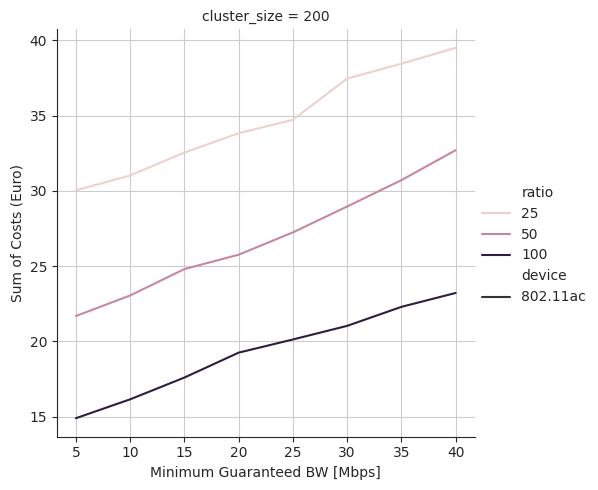

In [80]:
#sns.set_style("ticks",{'axes.grid' : True
#costs_df.reset_index(inplace=True)
fg = sns.relplot(data=costs_df[(costs_df.cluster_size==100) & (costs_df.device=='802.11ad_pro')], x='mgb', hue='ratio', y='sum', kind='line', style='device',col="cluster_size")
fg.set_ylabels("Sum of Costs (Euro)")
fg.set_xlabels("Minimum Guaranteed BW [Mbps]")

fg=sns.relplot(data=costs_df[(costs_df.cluster_size==200) & (costs_df.device=='802.11ac')], x='mgb', hue='ratio', y='sum', kind='line', style='device',col="cluster_size")
fg.set_ylabels("Sum of Costs (Euro)")
fg.set_xlabels("Minimum Guaranteed BW [Mbps]")



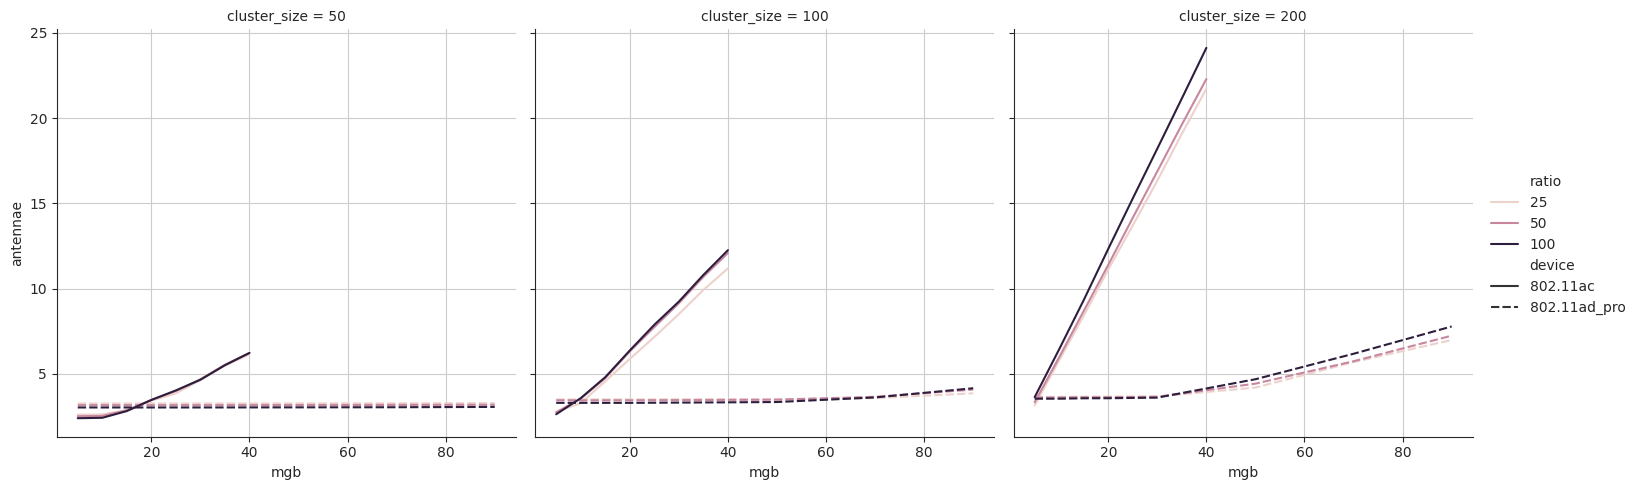

In [90]:
sns.set_style("ticks",{'axes.grid' : True})
sns.relplot(data=n_ant_df[n_ant_df.type=='gw'], x='mgb', hue='ratio', kind='line', col='cluster_size', y='antennae', style='device', facet_kws={'sharey': True, 'sharex': True})
fg.set_ylabels("Number of Devices")
fg.set_xlabels("Minimum Guaranteed BW [Mbps]")
plt.savefig("/home/gabriel/git/ODCM/analysis/figures/n_ant_gw.pdf")

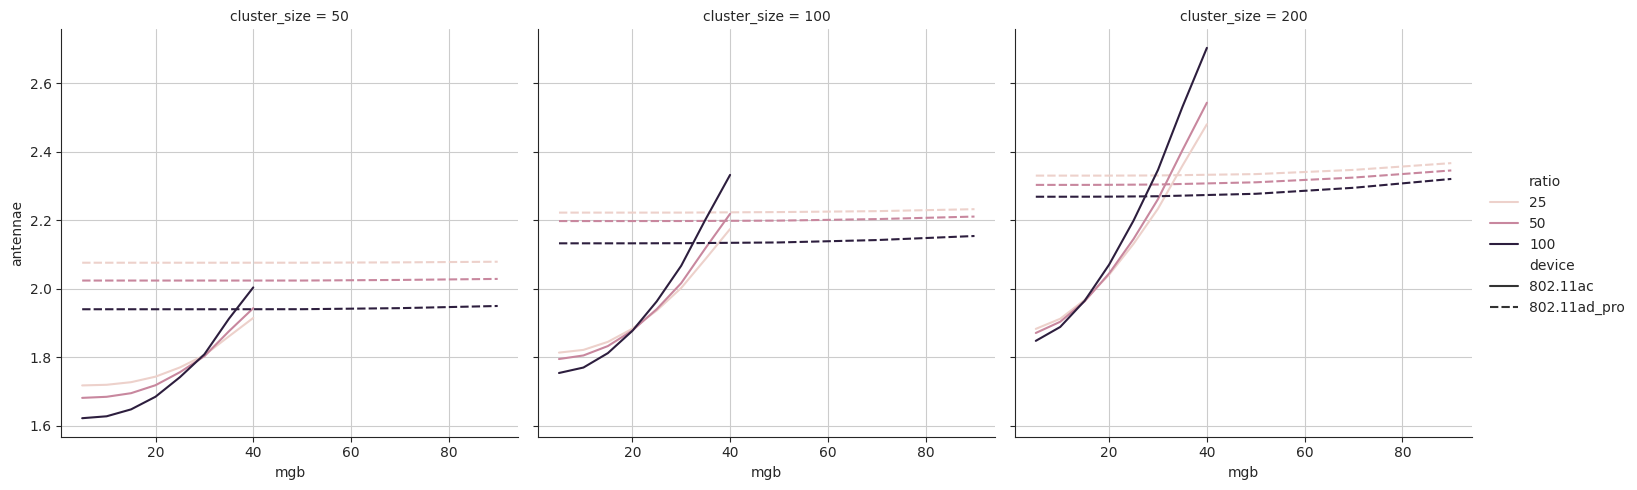

In [91]:
sns.set_style("ticks",{'axes.grid' : True})
sns.relplot(data=n_ant_df[n_ant_df.type=='relay'], x='mgb', hue='ratio', kind='line', col='cluster_size', y='antennae', style='device', facet_kws={'sharey': True, 'sharex': True})
plt.savefig("/home/gabriel/git/ODCM/analysis/figures/n_ant_relay.pdf")